# Example 5.4  - Accelerated Wear Testing of a Metal Alloy under Varying Applied Weights

**Author:** Justin Ryan  
**Created:** 2025-09-24  
**Updated:** 2025-10-07  
**Version:** 1.1  

---
## Problem Statement

Consider the following example involving a test of a particular metal alloy.  
The sliding test was conducted over a range of different applied weights to study the effect of weight on the wear mechanism.  
The ADT data in terms of weight loss in micrograms are presented in **Table 5.9** and plotted in **Figure 5.14**.  

Assume that a failure occurs when the amount of weight lost exceeds **50 micrograms**.  

Assume the **power model** for damage versus cycles:  

$
D(N, S) = \theta_1 N^{\theta_2},
$

where the parameter $\theta_1$ is a function of Stress (applied weight).

Tasks:  
1. **Explore appropriate stress model forms** based on the observed degradation trends.
2. Estimate the point estimates of the degradation model parameters, the use-level life if the operational applied weight is given as **5 g**, and the cycle-to-failure distribution at use-level stress using the **MLE method**.  
4. Compare assumptions of **additive and multiplicative noise models** and make a recommendation which degredation model might be best employed for PHM of a safety critical part.

---

## Solution

Two stress–degradation models are considered: a power–law (Power–Power) model and an exponential (Power–Exponential) model. Both provide an acceptable fit to the data, and the approximately homoscedastic residuals suggest that an additive error model is appropriate. For PHM of a safety-critical component, however, we must be cautious about extrapolation because both models are convex in the degradation–time domain. In this case, the power–exponential model yields a more conservative time-to-failure (TTF) distribution, with the median TTF estimated to be roughly two orders of magnitude lower than that of the Power–Power model.

In [1]:
# EXAMPLE 5.4 - Load Data
import pandas as pd
import sys 
sys.path.append("C:/Users/leaat/Dropbox/University of Maryland/ENRE648 - PPoF Chap Review - Degradation Analysis/ADT Fitters Module")
df_wide = pd.read_csv("C:/Users/leaat/Dropbox/University of Maryland/ENRE648 - PPoF Chap Review - Degradation Analysis/Modarres Chapter Validation/Data/Example_5.4_wear_weight_losses_data.csv") # Modified for more consistent shape parameter fits

# --- Convert wide → long (values are in GRAMS in the CSV) ---
value_cols = [c for c in df_wide.columns if c not in ["AppliedWeight (g)", "Unit"]]
long = df_wide.melt(id_vars=["AppliedWeight (g)", "Unit"], value_vars=value_cols, var_name="Cycles", value_name="WeightLoss (µg)")

# Ensure numeric dtypes
long["Cycles"] = pd.to_numeric(long["Cycles"], errors="coerce").astype(int)
long["AppliedWeight (g)"] = pd.to_numeric(long["AppliedWeight (g)"], errors="coerce")
long["WeightLoss (µg)"] = pd.to_numeric(long["WeightLoss (µg)"], errors="coerce")

# Failure threshold at 50 micrograms (now in µg to match the y-axis)
Df = 50.0   # micrograms
S_use = 5   # grams

# Final arrays (keep names explicit to avoid shadowing)
t_time = long["Cycles"] .to_numpy(float)
stress = long["AppliedWeight (g)"].to_numpy(float)
D_obs = long["WeightLoss (µg)"] .to_numpy(float)
unit = long["Unit"].to_numpy()

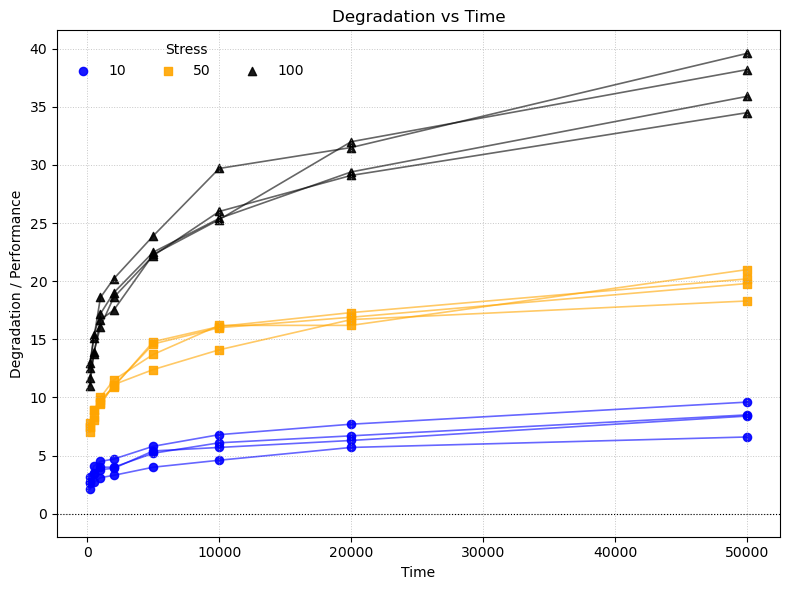

### Degradation / damage model

**Model form (damage scale)**

The Power–Power model uses power laws in both stress and time:

$$
D(t, S)
= b \, S^{n} \, t^{m}.
$$

**Parameters:**

- **$b$** – scale factor on the overall damage level  
- **$n$** – stress exponent (how strongly damage scales with stress $S$)  
- **$m$** – time exponent (how quickly damage accelerates with time)  
- **$S$** – accelerating stress (e.g. load, current, pressure)

### LSQ (95% CI)

| Parameter | Estimate | SE | 95% CI |
|-----------|----------|----|--------------|
| b | 0.15695 | 1.807 | [-3.384, 3.698] |
| n (stress) | 0.71713 | 2.084 | [-3.367, 4.802] |
| m (time) | 0.197066 | 0.1829 | [-0.1614, 0.5556] |

**Noise D:** 1.1854


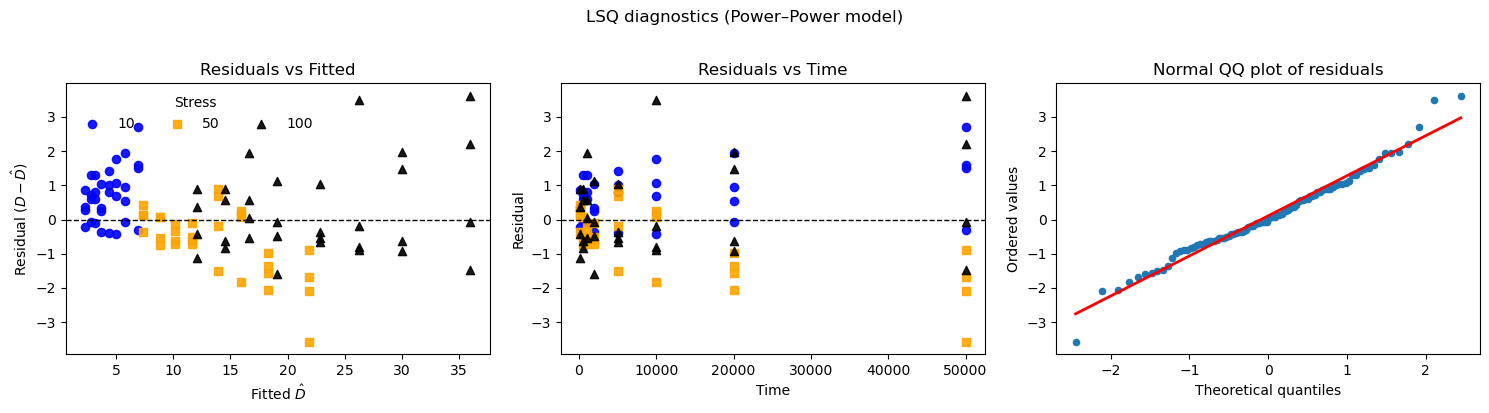


Estimated life at use (S = 5) for Df=50: t_med ≈ 1.44e+10 time units


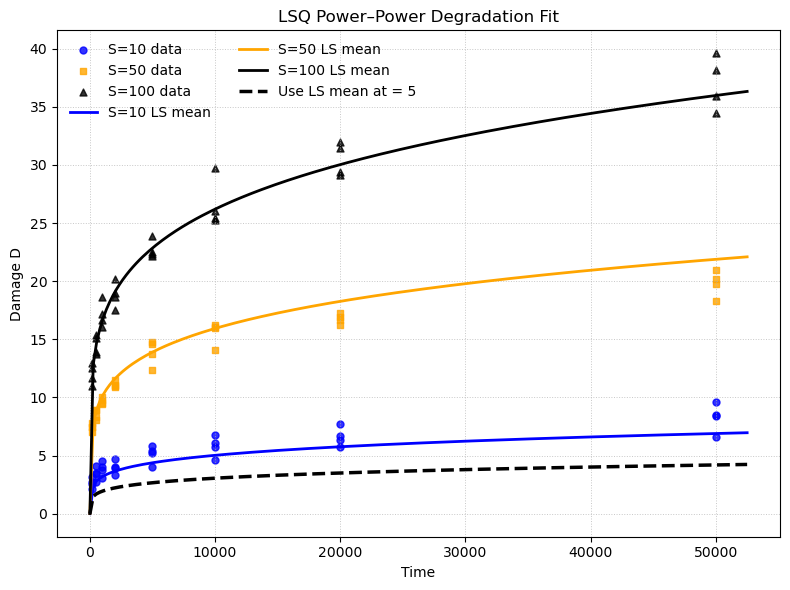

In [2]:
# EXAMPLE 5.4 - LSQ
from ADT_fitters import Fit_ADT_Power_Power
fit_pp = Fit_ADT_Power_Power(
    degradation=D_obs,
    stress=stress,
    time=t_time,
    unit = unit,
    stress_use=S_use,
    Df=Df,
    CI=0.95,
    method="LS",
    show_data_plot=True,
    show_LSQ_diagnostics=True,
    print_results=True)
fit_pp.plot_data(save="5.4_data.png")
fit_pp._plot_fit_LS(save = "5.4_LS_PP_fit.png")

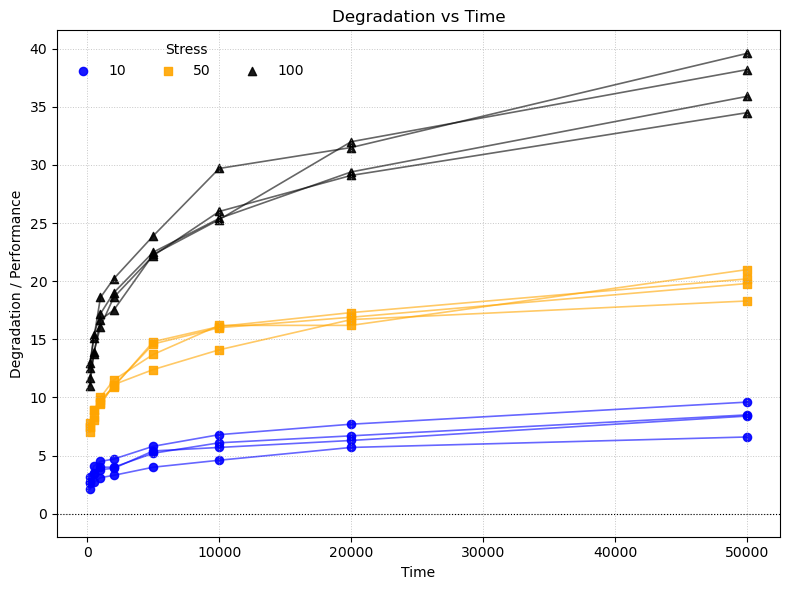

### Degradation / damage model

**Model form (damage scale)**

Damage follows a power law in time, with an exponential dependence on stress:

$$
D(t, S)
= b \,\exp(a S)\, t^{n}.
$$

**Parameters:**

- **$b$** – overall scale factor on damage  
- **$a$** – stress sensitivity (how strongly stress amplifies damage)  
- **$n$** – time exponent (damage growth with time)  
- **$S$** – accelerating stress (e.g. load, current)

### LSQ (95% CI)

| Parameter | Estimate | SE | 95% CI |
|-----------|----------|----|--------------|
| b | 1.06099 | 5.362 | [-9.449, 11.57] |
| a | 0.0141118 | 0.1166 | [-0.2144, 0.2426] |
| n | 0.198024 | 0.5592 | [-0.898, 1.294] |

**Noise D:** 1.62315


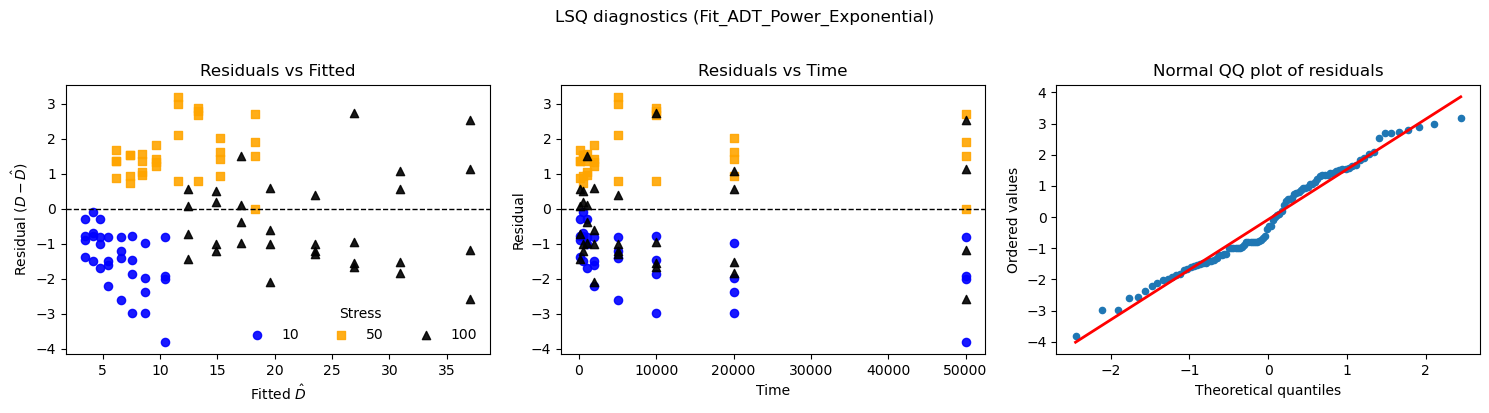


Estimated life at use (S = 5) for Df=50: t_med ≈ 1.97e+08 time units


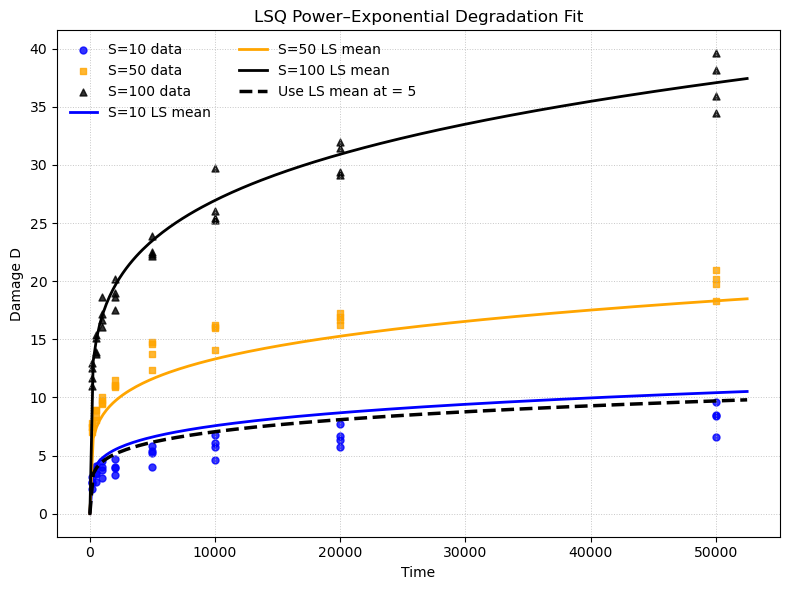

In [3]:
# EXAMPLE 5.4 - LSQ
from ADT_fitters import Fit_ADT_Power_Exponential
fit_pe = Fit_ADT_Power_Exponential(
    degradation=D_obs,
    stress=stress,
    time=t_time,
    unit = unit,
    stress_use=S_use,
    Df=Df,
    CI=0.95,
    method="LS",
    show_data_plot=True,
    show_LSQ_diagnostics=True,
    print_results=True)
fit_pe._plot_fit_LS(save = "5.4_LS_PE_fit.png")

### Degradation / damage model

**Model form (damage scale)**

The Power–Power model uses power laws in both stress and time:

$$
D(t, S)
= b \, S^{n} \, t^{m}.
$$

**Parameters:**

- **$b$** – scale factor on the overall damage level  
- **$n$** – stress exponent (how strongly damage scales with stress $S$)  
- **$m$** – time exponent (how quickly damage accelerates with time)  
- **$S$** – accelerating stress (e.g. load, current, pressure)

### MLE (additive) (95% CI)

| Parameter | Estimate | SE | 95% CI |
|-----------|----------|----|--------------|
| b | 0.156951 | 0.8508 | [-1.511, 1.824] |
| n (stress) | 0.71713 | 0.9329 | [-1.111, 2.546] |
| m (time) | 0.197065 | 0.6371 | [-1.052, 1.446] |

**Noise D:** 1.16673



Information criteria (MLE, 96 obs):
  AIC =    310.043
  BIC =    320.301


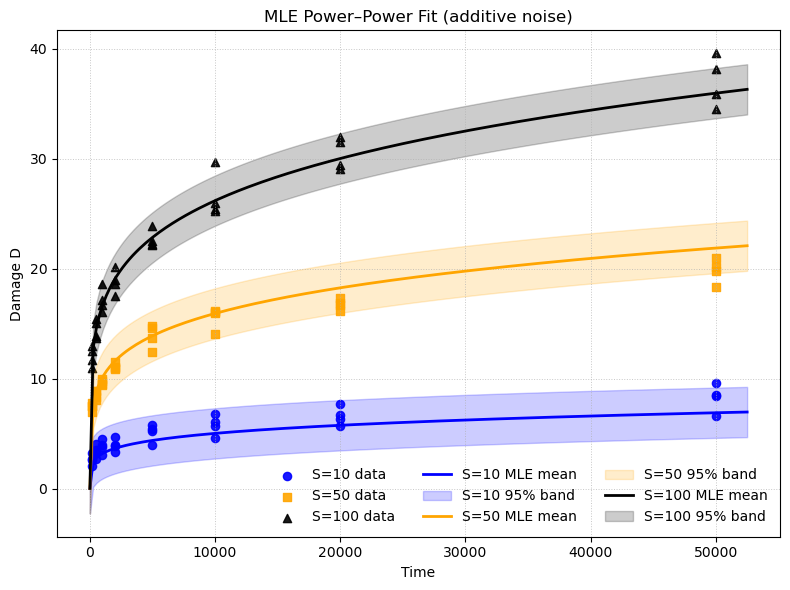

### Posterior summary for TTF at S=5 (Df=50.0)

- Mean life: 1.4538e+10 time units
- Median life: 1.4445e+10 time units
- 95% HDI: [1.1304e+10, 1.8088e+10] time units
- 95% ETI: [1.1363e+10, 1.8175e+10] time units

c:\users\leaat\reliability\reliability\Fitters.py:440: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 8000/0 (0% right censored) 

   Distribution       Alpha    Beta       Gamma     Alpha 1  Beta 1     Alpha 2  Beta 2 Proportion 1 DS          Mu       Sigma      Lambda  Log-likelihood   AICc    BIC       AD   optimizer
   Lognormal_2P                                                                                             23.3929     0.11972                     -181514 363032 363046 0.998519         TNC
   Lognormal_3P                               0                                                             23.3929     0.11972                     -181514 363034 363055 0.998519         TNC
      Normal_2P                                                                                         1.45383e+10 1.73466e+09                     -181557 363117 363131  6.13633    L-BFGS-B
     Weibull_3P 5.86844e+09 3.27843 9.27117e+09                                                                                   

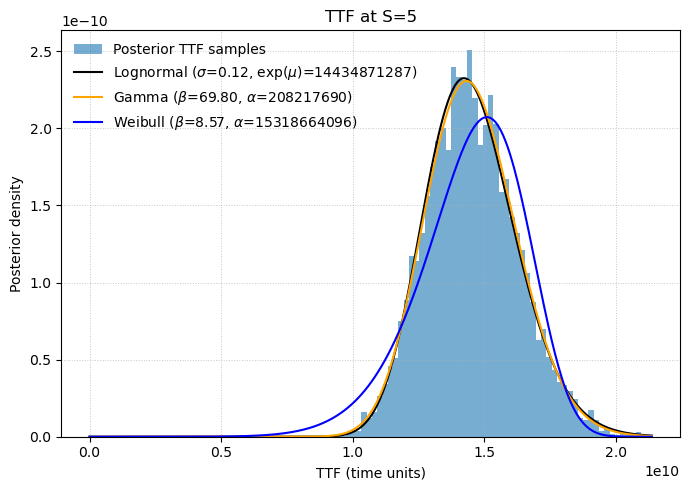

In [4]:
# EXAMPLE 5.4 - MLE
from ADT_fitters import Fit_ADT_Power_Power
fit_pp = Fit_ADT_Power_Power(
    degradation=D_obs,
    stress=stress,
    time=t_time,
    unit = unit,
    stress_use=S_use,
    Df=Df,
    CI=0.95,
    method="MLE",
    noise="additive",
    show_data_plot=False,
    show_LSQ_diagnostics=False,
    show_noise_bounds=True,
    show_use_TTF_dist=True,
    print_results=True)
fit_pp._plot_fit_MLE(save = "5.4_MLE_PPA_fit.png")
# fit_pp._plot_use_TTF_distribution_MLE(unit_label="Cycles", save = "5.4_MLE_PPA_TTF.png")

### Degradation / damage model

**Model form (damage scale)**

Damage follows a power law in time, with an exponential dependence on stress:

$$
D(t, S)
= b \,\exp(a S)\, t^{n}.
$$

**Parameters:**

- **$b$** – overall scale factor on damage  
- **$a$** – stress sensitivity (how strongly stress amplifies damage)  
- **$n$** – time exponent (damage growth with time)  
- **$S$** – accelerating stress (e.g. load, current)

### MLE (additive) (95% CI)

| Parameter | Estimate | SE | 95% CI |
|-----------|----------|----|--------------|
| b | 1.06099 | 1 | [-0.8989, 3.021] |
| a | 0.0141118 | 0.09739 | [-0.1768, 0.205] |
| n | 0.198024 | 0.9953 | [-1.753, 2.149] |

**Noise D:** 1.59758



Information criteria (MLE, 96 obs):
  AIC =    370.387
  BIC =    380.644


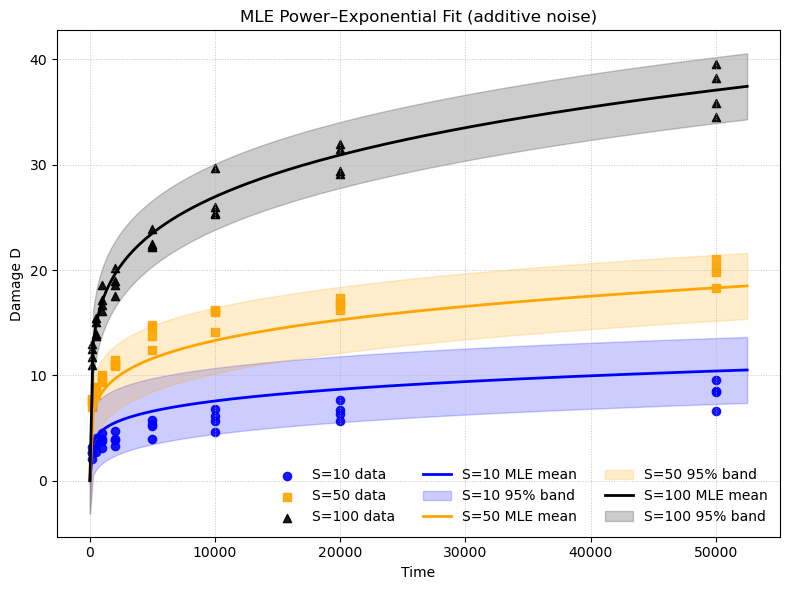

In [5]:
# EXAMPLE 5.4 - MLE
from ADT_fitters import Fit_ADT_Power_Exponential
fit_pe = Fit_ADT_Power_Exponential(
    degradation=D_obs,
    stress=stress,
    time=t_time,
    unit = unit,
    stress_use=S_use,
    Df=Df,
    CI=0.95,
    method="MLE",
    noise="additive",
    show_data_plot=False,
    show_LSQ_diagnostics=False,
    show_noise_bounds=True,
    show_use_TTF_dist=False,
    print_results=True)
fit_pe._plot_fit_MLE(save = "5.4_MLE_PEA_fit.png")

### Degradation / damage model

**Model form (damage scale)**

The Power–Power model uses power laws in both stress and time:

$$
D(t, S)
= b \, S^{n} \, t^{m}.
$$

**Parameters:**

- **$b$** – scale factor on the overall damage level  
- **$n$** – stress exponent (how strongly damage scales with stress $S$)  
- **$m$** – time exponent (how quickly damage accelerates with time)  
- **$S$** – accelerating stress (e.g. load, current, pressure)

### MLE (multiplicative) (95% CI)

| Parameter | Estimate | SE | 95% CI |
|-----------|----------|----|--------------|
| b | 0.214251 | 2.895 | [-5.46, 5.889] |
| n (stress) | 0.648121 | 0.1062 | [0.44, 0.8563] |
| m (time) | 0.193868 | 1.905 | [-3.54, 3.927] |

**Noise log D:** 0.101555



Information criteria (MLE, 96 obs):
  AIC =    294.287
  BIC =    304.545


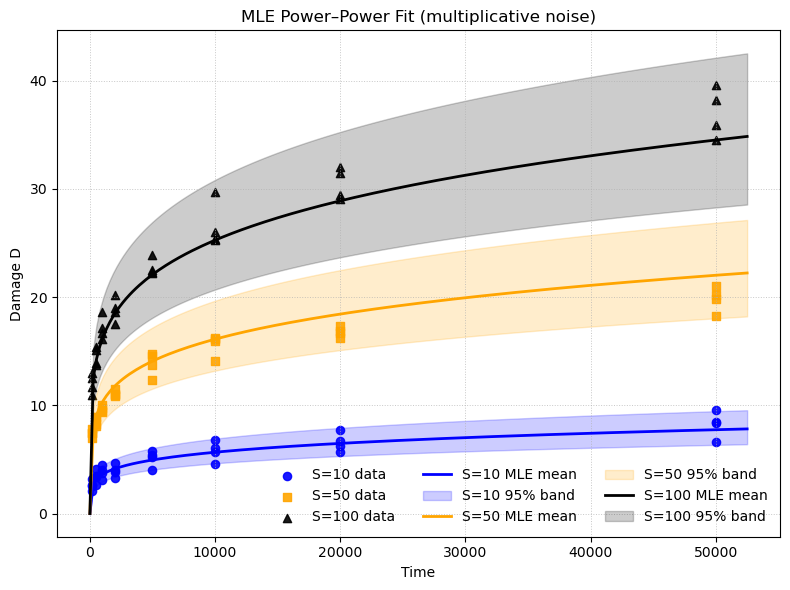

### Posterior summary for TTF at S=5 (Df=50.0)

- Mean life: 8.7869e+09 time units
- Median life: 7.6193e+09 time units
- 95% HDI: [1.8007e+09, 1.8482e+10] time units
- 95% ETI: [2.6996e+09, 2.1553e+10] time units

c:\users\leaat\reliability\reliability\Fitters.py:440: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 8000/0 (0% right censored) 

   Distribution       Alpha    Beta       Gamma     Alpha 1  Beta 1     Alpha 2  Beta 2 Proportion 1 DS          Mu       Sigma      Lambda  Log-likelihood   AICc    BIC       AD optimizer
   Lognormal_2P                                                                                              22.757    0.529438                     -188320 376644 376658 0.262938       TNC
   Lognormal_3P                               0                                                              22.757    0.529438                     -188320 376646 376667 0.262938       TNC
       Gamma_3P 2.86446e+09 2.66182 1.16225e+09                                                                                                     -188374 376753 376774  7.82747       TNC
 Loglogistic_3P 7.03671e+09 3.01927 5.72135e+08                                                                                           

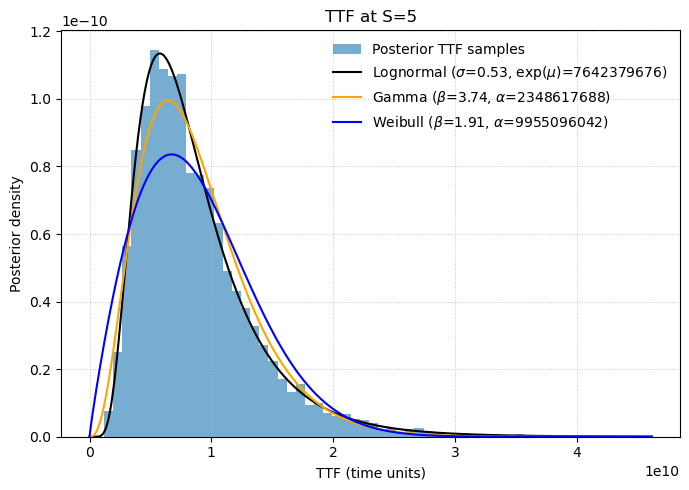

In [6]:
# EXAMPLE 5.4 - MLE
from ADT_fitters import Fit_ADT_Power_Power
fit_pp = Fit_ADT_Power_Power(
    degradation=D_obs,
    stress=stress,
    time=t_time,
    unit = unit,
    stress_use=S_use,
    Df=Df,
    CI=0.95,
    method="MLE",
    noise="multiplicative",
    show_data_plot=False,
    show_LSQ_diagnostics=False,
    show_noise_bounds=True,
    show_use_TTF_dist=True,
    print_results=True)
fit_pp._plot_fit_MLE(save = "5.4_MLE_PPM_fit.png")
# fit_pp._plot_use_TTF_distribution_MLE(unit_label="Cycles", save = "5.4_MLE_PPM_TTF.png")

### Degradation / damage model

**Model form (damage scale)**

Damage follows a power law in time, with an exponential dependence on stress:

$$
D(t, S)
= b \,\exp(a S)\, t^{n}.
$$

**Parameters:**

- **$b$** – overall scale factor on damage  
- **$a$** – stress sensitivity (how strongly stress amplifies damage)  
- **$n$** – time exponent (damage growth with time)  
- **$S$** – accelerating stress (e.g. load, current)

### MLE (multiplicative) (95% CI)

| Parameter | Estimate | SE | 95% CI |
|-----------|----------|----|--------------|
| b | 0.916042 | 61.2 | [-119, 120.9] |
| a | 0.0165862 | 0.6132 | [-1.185, 1.218] |
| n | 0.193867 | 4.601 | [-8.824, 9.212] |

**Noise log D:** 0.167857



Information criteria (MLE, 96 obs):
  AIC =    390.769
  BIC =    401.026


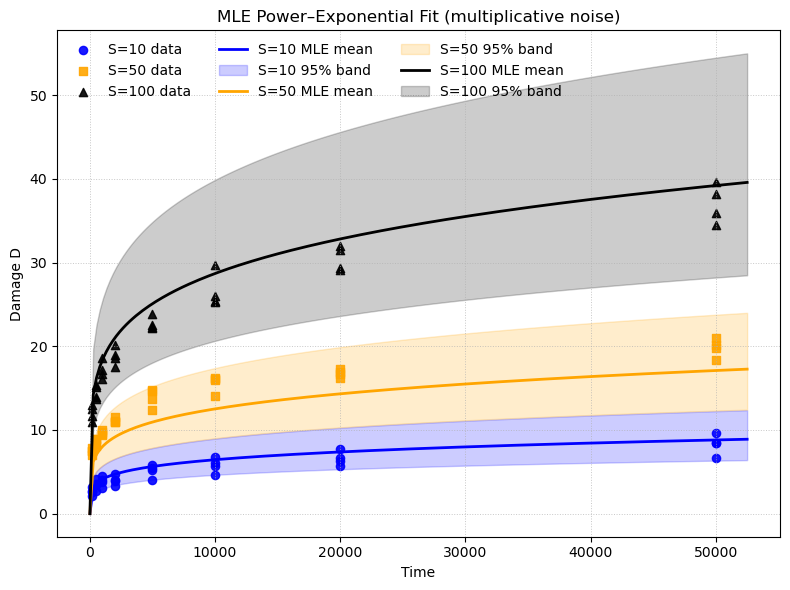

In [7]:
# EXAMPLE 5.4 - MLE
from ADT_fitters import Fit_ADT_Power_Exponential
fit_pe = Fit_ADT_Power_Exponential(
    degradation=D_obs,
    stress=stress,
    time=t_time,
    unit = unit,
    stress_use=S_use,
    Df=Df,
    CI=0.95,
    method="MLE",
    noise="multiplicative",
    show_data_plot=False,
    show_LSQ_diagnostics=False,
    show_noise_bounds=True,
    show_use_TTF_dist=False,
    print_results=True)
fit_pe._plot_fit_MLE(save = "5.4_MLE_PEM_fit.png")